In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
portuguese = pd.read_csv('../../data/raw/student-por.csv', delimiter=';')

### Rename columns

In [3]:
# names may be verbose but I find them more descriptive
column_map = {
    "Pstatus": "parent_cohabitation_status",
    "Medu": "mother's_edu",
    "Fedu": "father's_edu",
    "Fjob": "father's_job",
    "Mjob": "mother's_job",
    "reason": "reason_to_choose_school",
    "schoolsup": "extra_edu_support",
    "famsup": "family_edu_support",
    "paid":"extra_paid_classes",
    "activites": "extra_cirricular_activites",
    "nursery": "attended_nursery",
    "higher": "interested_in_higher_edu",
    "internet": "internet_access",
    "romantic": "in_romantic_relationship",
    "famrel": "quality_of_fam_time",
    "freetime": "free_time_after_school",
    "goout": "goes_out_with_friends",
    "Dalc": "daily_alcohol_consumption",
    "Walc": "weekend_alcohol_consumption",
    "health": "current_health_status",
    "G1": "first_grade_period",
    "G2": "second_grade_period",
    "G3": "final_grade"
}

portuguese = portuguese.rename(columns=column_map)
portuguese.head()

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
portuguese.shape

(649, 33)

### Check for missing values

In [5]:
# We do not have missing values
portuguese.isna().sum()

school                         0
sex                            0
age                            0
address                        0
famsize                        0
parent_cohabitation_status     0
mother's_edu                   0
father's_edu                   0
mother's_job                   0
father's_job                   0
reason_to_choose_school        0
guardian                       0
traveltime                     0
studytime                      0
failures                       0
extra_edu_support              0
family_edu_support             0
extra_paid_classes             0
activities                     0
attended_nursery               0
interested_in_higher_edu       0
internet_access                0
in_romantic_relationship       0
quality_of_fam_time            0
free_time_after_school         0
goes_out_with_friends          0
daily_alcohol_consumption      0
weekend_alcohol_consumption    0
current_health_status          0
absences                       0
first_grad

### Explore

In [6]:
portuguese.describe()

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<Axes: xlabel='absences', ylabel='Count'>

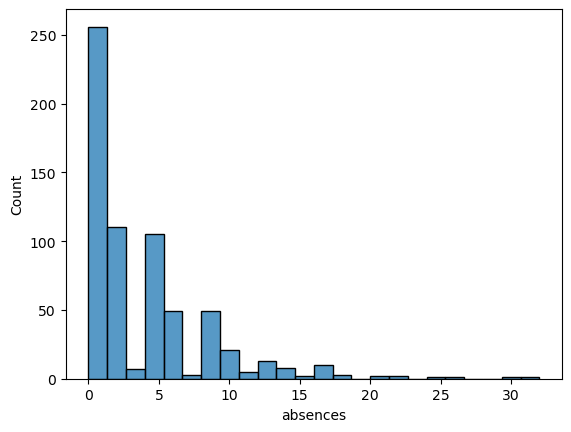

In [7]:
# Visualizing abscences to determine whether to drop outliers

sns.histplot(portuguese['absences'])

In [8]:
portuguese[portuguese['absences'] > 18]


,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
150,GP,F,15,U,GT3,A,3,3,services,services,...,1,3,2,2,3,1,24,9,8,9
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
197,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,32,14,13,14
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16
217,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13
256,GP,M,18,U,GT3,T,2,2,other,at_home,...,4,4,3,2,2,1,26,7,8,8
325,GP,M,17,U,LE3,A,4,1,services,other,...,4,5,4,2,4,5,22,11,11,10
413,GP,M,21,R,LE3,T,1,1,at_home,other,...,5,3,3,5,2,4,21,9,10,10


In [9]:
# There are 15 students who's final grade is 0
# Each of these students also happen to have 0 absences
# I find this a bit suspicous, perhaps an entry error however for the intial model I have decided to keep all data
# In the next iteration of the model, perhaps we will figure out an appropriate way to handle these values
portuguese[portuguese['final_grade'] == 0]

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
163,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,11,9,0
440,MS,M,16,U,GT3,T,1,1,at_home,services,...,5,4,5,4,5,3,0,7,0,0
519,MS,M,16,R,GT3,T,2,1,other,services,...,5,2,1,1,1,2,0,8,7,0
563,MS,M,17,U,GT3,T,2,2,other,other,...,1,2,1,2,3,5,0,7,0,0
567,MS,M,18,R,GT3,T,3,2,services,other,...,2,3,1,2,2,5,0,4,0,0
583,MS,F,18,R,GT3,T,2,2,other,other,...,5,5,5,1,1,3,0,8,6,0
586,MS,F,17,U,GT3,T,4,2,teacher,services,...,5,5,5,1,3,5,0,8,8,0
597,MS,F,18,R,GT3,T,2,2,at_home,other,...,4,3,3,1,1,4,0,9,0,0
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0
605,MS,F,19,U,GT3,T,1,1,at_home,services,...,5,5,5,2,3,2,0,5,0,0


<Axes: xlabel='absences', ylabel='final_grade'>

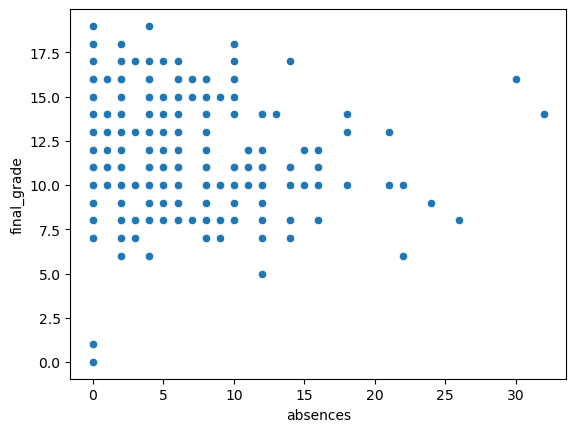

In [10]:
# It appears that many students have the same final grade despite having a vareity in absences
# Some students do just as well as others despite having many abscences
sns.scatterplot(data=portuguese, x='absences', y='final_grade')

### Dummy variables

In [11]:
# converting binary variable and nominal into dummy variables
# including "drop_first=True" is used to avoid multicollinearity
portuguese_bool = pd.get_dummies(portuguese, drop_first=True)
portuguese_bool

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,...,guardian_mother,guardian_other,extra_edu_support_yes,family_edu_support_yes,extra_paid_classes_yes,activities_yes,attended_nursery_yes,interested_in_higher_edu_yes,internet_access_yes,in_romantic_relationship_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


In [12]:
#convert bools into 0s and 1s
portuguese_encoded = portuguese_bool.astype(int)
portuguese_encoded

,age,mother's_edu,father's_edu,traveltime,studytime,failures,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,...,guardian_mother,guardian_other,extra_edu_support_yes,family_edu_support_yes,extra_paid_classes_yes,activities_yes,attended_nursery_yes,interested_in_higher_edu_yes,internet_access_yes,in_romantic_relationship_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


### Save data for modeling

In [13]:
portuguese_encoded.to_csv("../../data/processed/cleaned-student-por.csv", index=False)